# Klasifikasi menggunakan MLP

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 7 - Klasifikasi.**

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample

In [2]:
# Mendefiniskan parameter untuk training
epochs = 25
batch_size = 32
random_seed = 42

np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Data Ingestion

In [3]:
# Membaca file CSV
df = pd.read_csv(r'../datasets/breast-cancer-wisconsin.csv')

## Exploratory Data Analysis

In [4]:
# Menampilkan keterangan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   adhesion   699 non-null    int64 
 5   cell-size  699 non-null    int64 
 6   nuclei     699 non-null    object
 7   chromatin  699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
# cari data bukan angka
df[df["nuclei"].apply(lambda x: not x.isnumeric())]

,id,thickness,size,shape,adhesion,cell-size,nuclei,chromatin,nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


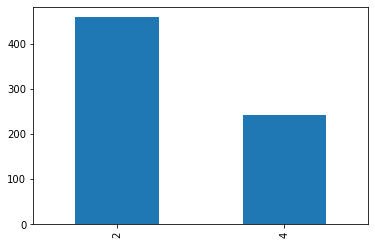

In [6]:
# Melihat target kelas
df["class"].value_counts().plot(kind="bar")

## Preprocessing

In [7]:
# Menghapus data non-numerik
df = df[df["nuclei"].apply(lambda x: x.isnumeric())]
df["nuclei"] = df["nuclei"].astype("int64")

In [8]:
# Mengapus kolom yang tidak diperlukan
df = df.drop(["id"], axis=1)

In [9]:
# Transformasi kelas menjadi teks
df["class"] = df["class"].apply(lambda x: np.where(x == 2, "benign", "malignant"))

In [10]:
# Downsampling
df_majority = df[df["class"] == "benign"]
df_minority = df[df["class"] == "malignant"]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=random_seed)
df = pd.concat([df_majority_downsampled, df_minority])

In [11]:
# Memisahkan 
X = df.iloc[:, :-1].values
y = df.iloc[:, 9].values

In [12]:
# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

In [13]:
# Encode menggunakan label encoder
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

## Training

In [14]:
# Membuat arsitektur model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [15]:
# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Lakukan training menggunakan data latih
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 382 samples, validate on 96 samples
Epoch 1/25
382/382 [==============================] - 3s 8ms/sample - loss: 0.8241 - accuracy: 0.5105 - val_loss: 0.5929 - val_accuracy: 0.5000
Epoch 2/25
382/382 [==============================] - 0s 348us/sample - loss: 0.5298 - accuracy: 0.5366 - val_loss: 0.4338 - val_accuracy: 0.7500
Epoch 3/25
382/382 [==============================] - 0s 128us/sample - loss: 0.4120 - accuracy: 0.8665 - val_loss: 0.3653 - val_accuracy: 0.9167
Epoch 4/25
382/382 [==============================] - 0s 133us/sample - loss: 0.3487 - accuracy: 0.9005 - val_loss: 0.3008 - val_accuracy: 0.9583
Epoch 5/25
382/382 [==============================] - 0s 131us/sample - loss: 0.3051 - accuracy: 0.9084 - val_loss: 0.2484 - val_accuracy: 0.9688
Epoch 6/25
382/382 [==============================] - 0s 128us/sample - loss: 0.2711 - accuracy: 0.9241 - val_loss: 0.2059 - val_accuracy: 0.9688
Epoch 7/25
382/382 [==============================] - 0s 126us/sample - loss: 0.2

## Evaluation

In [17]:
# Lakukan prediksi 
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [18]:
# Hitung statistik prediksi
print(classification_report(y_test, y_pred, target_names=lb.classes_))

precision    recall  f1-score   support

      benign       1.00      1.00      1.00        48
   malignant       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



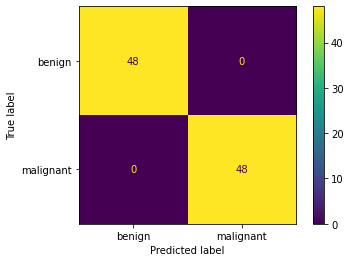

In [19]:
# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

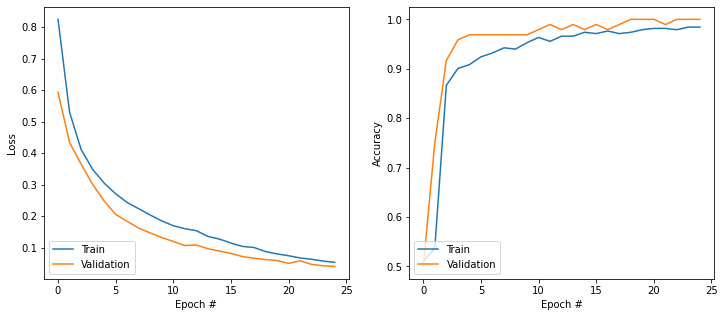

In [20]:
# Tampilkan statistik training model
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Validation")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend(loc="lower left")

ax2 = plt.subplot(1, 2, 2, sharex = ax1)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="Train")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="Validation")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower left")

## Prediction

In [22]:
# Melakukan prediksi
data_pred = [[8, 4, 5, 1, 2, 1, 7, 3, 1]]
model.predict(data_pred)

array([[0.6405598]], dtype=float32)